In [77]:
import pandas as pd

data = pd.read_csv("train.csv")

In [78]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

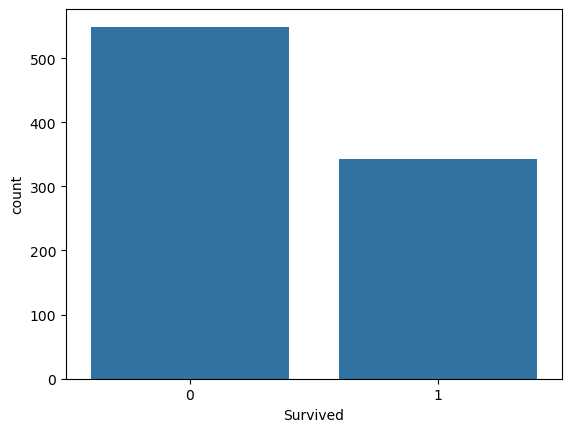

In [80]:
import seaborn as sb

sb.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

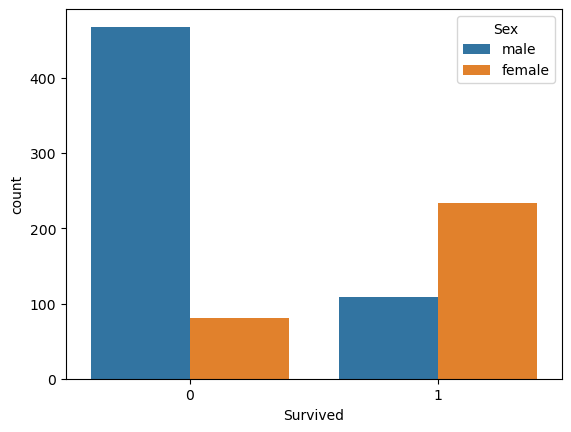

In [81]:
sb.countplot(x="Survived",data=data,hue="Sex")

In [82]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

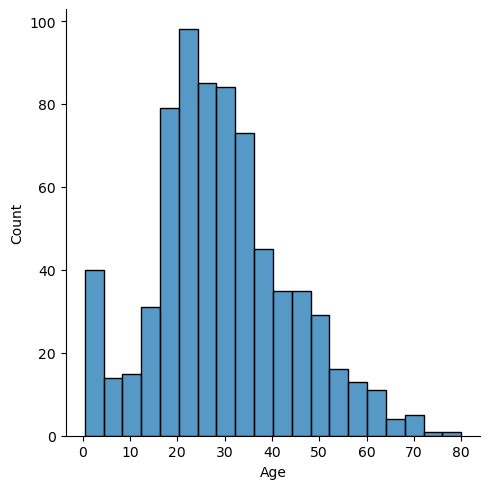

In [83]:
sb.displot(x="Age",data=data)

In [84]:
data["Age"].mean()

29.69911764705882

In [85]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [86]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
data.drop(columns=["PassengerId","Name","Cabin"],inplace=True)

In [88]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [89]:
data = data.dropna()

In [90]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [91]:
dummies_sex = pd.get_dummies(data["Sex"],drop_first=True,dtype=int)

In [92]:
data = data.join(dummies_sex)

In [93]:
data.drop(columns=["Sex","Ticket"],inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

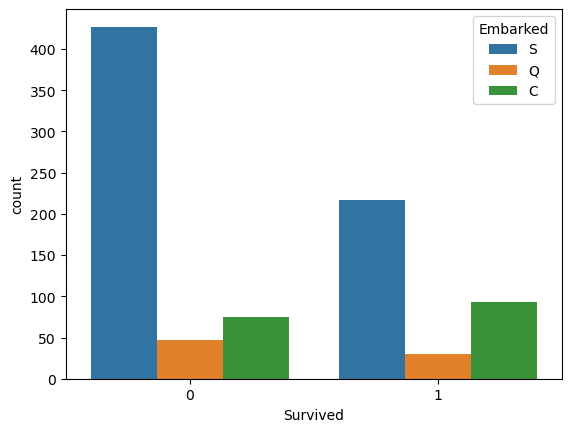

In [94]:
sb.countplot(data=data,x="Survived",hue="Embarked")

In [95]:
dummies_embarked = pd.get_dummies(data["Embarked"],drop_first=True,dtype=int)

In [96]:
data = data.join(dummies_embarked)
data.drop(columns=["Embarked"],inplace=True)

<Axes: >

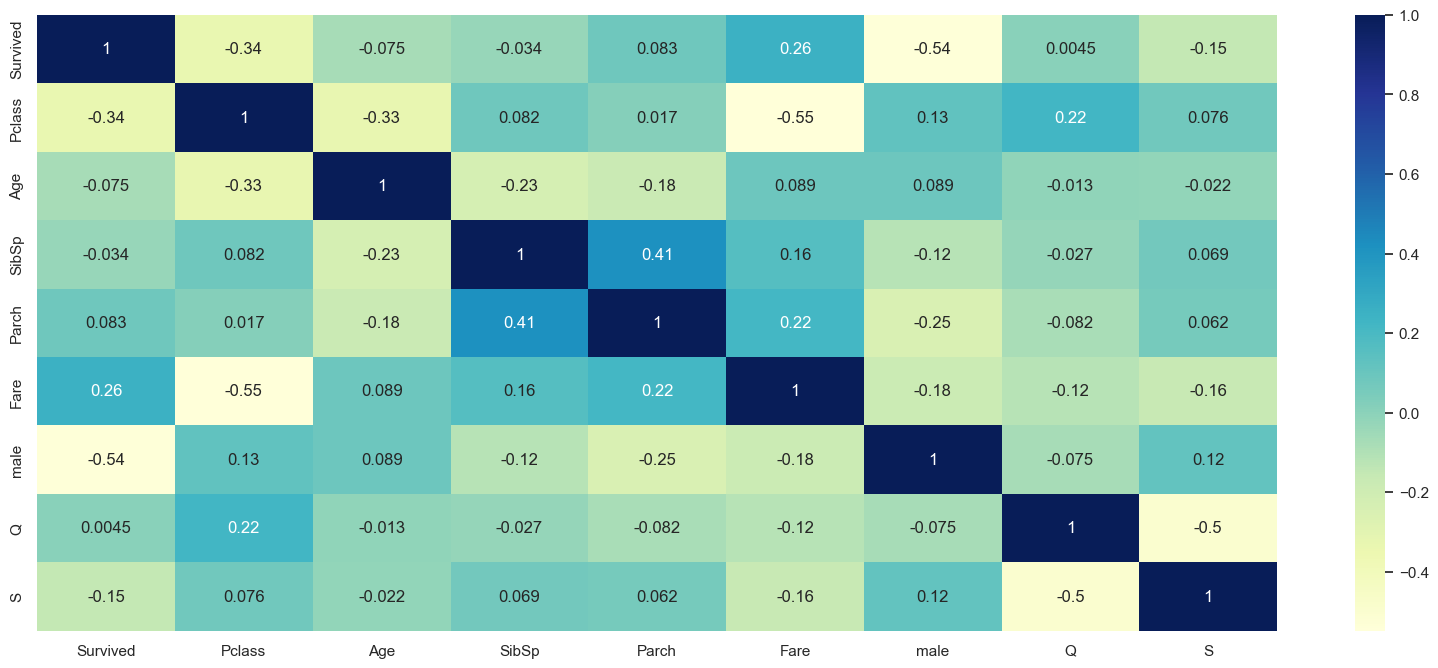

In [101]:
sb.set_theme(rc={'figure.figsize':(20,8)})
sb.heatmap(data=data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

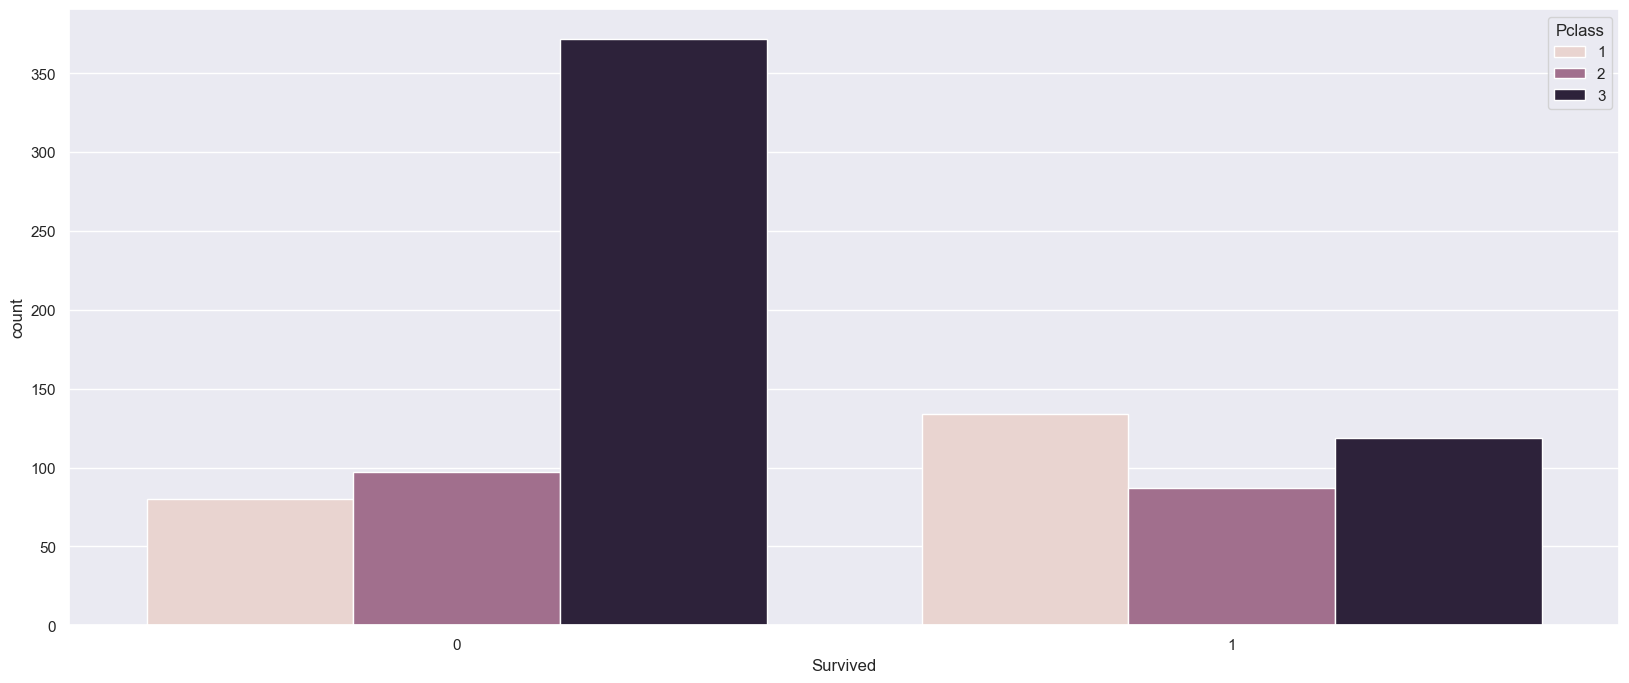

In [105]:
sb.countplot(x="Survived",data=data,hue="Pclass")

In [106]:
x = data.drop(columns=["Survived"],axis=1)
y = data["Survived"]

In [107]:
from sklearn.model_selection import train_test_split

x_tra, x_test, y_tra, y_test = train_test_split(x,y,test_size=.2)

In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_tra,y_tra)

LogisticRegression(max_iter=1000)

In [109]:
prediccion = model.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediccion)

0.797752808988764

In [112]:
from sklearn. metrics import classification_report
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.71      0.73      0.72        63

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

